In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import data_handler as dh




x_train, x_test = dh.load_data()

# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


print type(x_train)
print x_test
print x_train.shape
print x_test.shape



Using TensorFlow backend.


<type 'numpy.ndarray'>
[[  0 121 102 ...,   0   0  82]
 [  0 113  44 ..., 152   0 165]
 [  0 221   0 ...,  25   0 161]
 ..., 
 [  0 301  40 ..., 481   0  55]
 [  0 101 118 ..., 402   0 120]
 [  0  58   0 ..., 152   0  92]]
(115, 15801)
(29, 15801)


In [2]:
# this is the size of our encoded representations
encoding_dim = 10000  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(15801,))

encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(5000, activation='relu')(encoded)

decoded = Dense(10000, activation='relu')(encoded)
decoded = Dense(15801, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.compile(optimizer='rmsprop', loss='mse')
# autoencoder.save('denoisedAE.h5')

In [3]:
# autoencoder.fit(x_train, x_train,
#                 epochs=10,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(x_test, x_test))


# # encode and decode some digits
# # note that we take them from the *test* set
# encoded_imgs = encoder.predict(x_test)
# decoded_imgs = decoder.predict(encoded_imgs)

# def plot():
#     pass



In [4]:
def plot():

    plt.imshow(x_train, cmap='hot', interpolation='nearest')
    plt.show()

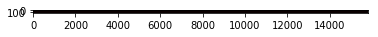

In [5]:
plot()

In [6]:
x_train.shape

(115, 15801)